In [1]:
import os
os.chdir("../../..")
import deepof.data

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%load_ext autoreload
%autoreload 2

# DeepOF supervised pipeline: detecting pre-defined behaviors

##### Tutorial index:
    
    * Brief introduction to supervised analysis, including the figure with all tracked behaviors.
    * Load the previous project.
    * Run the supervised annotation pipeline.
    * Visualize global embeddings using the retrieved traits.
    * Visualize animated unsupervised embeddings, coloured by specific traits.
    * Explore trait enrichment across conditions.
    * Generate Gantt plots with all traits.
    * Export video snippets.

### Supervised annotation in DeepOF - search for pre-established patterns

### Load a previously initiated project

In [26]:
import pickle

# # FC data
# my_deepof_project = deepof.data.load_project("./deepof_FC_project_files/")

# with open("./deepof_FC_project_files/Coordinates/FC_dataset_experimental_conditions.pkl", "rb") as handle:
#     exp_conditions = pickle.load(handle)
# my_deepof_project._exp_conditions = exp_conditions

# SI data
my_deepof_project = deepof.data.load_project("NatComm_trained_models/deepof_OF_project/")
with open("deepof_OF_exp_conds.pkl", "rb") as handle:
    exp_conds = pickle.load(handle)
my_deepof_project._exp_conditions = exp_conds

# Update project path to a local path
my_deepof_project._project_path = "NatComm_trained_models/"
my_deepof_project._project_name = "deepof_OF_project"
my_deepof_project._trained_model_path = "./deepof/trained_models/"
my_deepof_project._videos = sorted([i.replace(".mp4", "DLC.mp4") for i in my_deepof_project._videos])

### Run the supervised annotation pipeline.

In [ ]:
supervised_annotation = my_deepof_project.supervised_annotation(
    video_output=['20191203_Day1_SI_JB08_Test_11'], frame_limit=1500, debug=True,
)


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 37/53 [02:03<00:49,  3.08s/it]


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 40/53 [02:14<00:42,  3.29s/it]

In [30]:
supervised_annotation['20191203_Day1_OF_JB08_Test_11'].sum() / 25

climbing       133.44000
sniffing        25.76000
huddle          90.60000
lookaround     189.80000
speed         3080.69704
dtype: float64

### Explore trait enrichment across conditions.

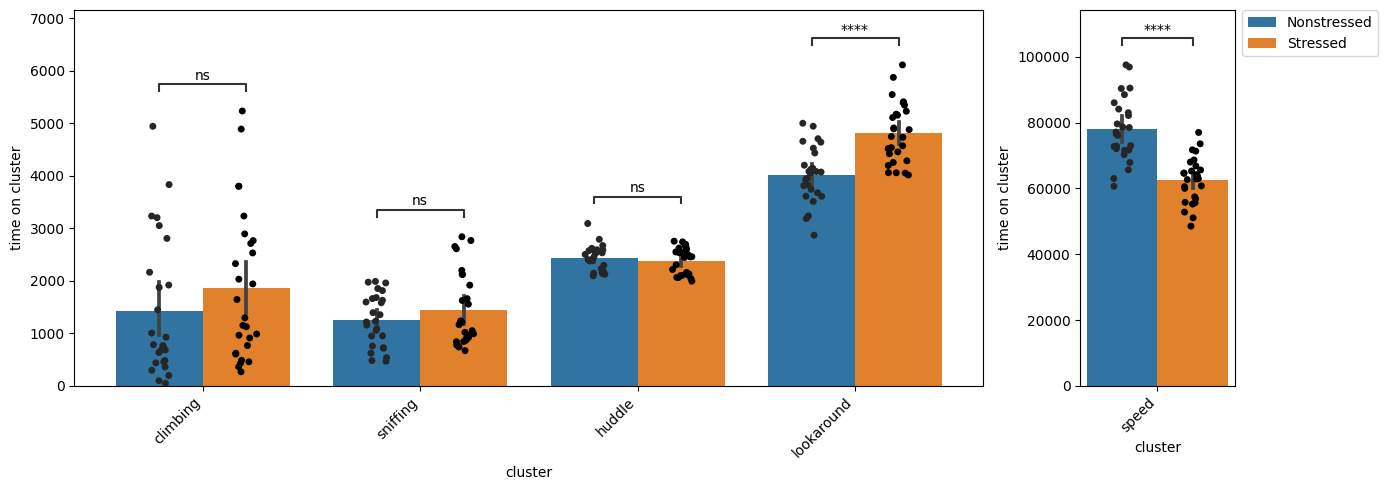

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(14, 5)).subplot_mosaic(
    mosaic="""
           AAAAB
           AAAAB
           """,
)

deepof.visuals.plot_enrichment(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    add_stats="Mann-Whitney",
    plot_proportions=True,
    ax = fig["A"],
)

deepof.visuals.plot_enrichment(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    add_stats="Mann-Whitney",
    plot_proportions=False,
    ax = fig["B"],
)

for ax in fig:
    fig[ax].set_xticklabels(fig[ax].get_xticklabels(), rotation=45, ha='right')
    fig[ax].set_title("")
    
fig["A"].get_legend().remove()

plt.tight_layout()    
plt.show()

### PCA embedding of supervised traits

### Generate Gantt plots with all traits.

### Exporting video snippets